# Problem 1

## (a) 
Show the distribution of mean values of N random variables obtained from a uniform distribution for increasing numbers of N (i.e., N = 2, 5, 20, 200) and compare each distribution with a Gaussian with the same mean and variance as the obtained distribution.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import mlab
import math

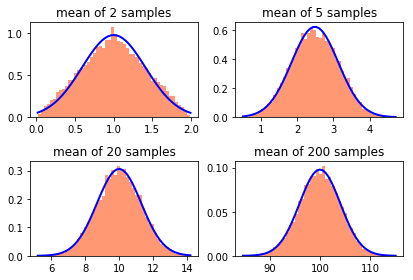

In [46]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

# Number of samples for each trial
samples = [2, 5, 20, 200]
numBins = 50
trials = 10**4

for i, N in enumerate(samples):
    plt.subplot(2,2,i+1)
    plt.tight_layout()
    means = []
    for i in range(trials):
        dist = np.random.uniform(0,1,N)
        means.append(sum(dist))
    mean = np.mean(means)
    variance = np.var(means)
    count, bins, ignored = plt.hist(means, numBins, normed = True, color = "coral", alpha = 0.8)
    plt.plot(bins, mlab.normpdf(bins, mean, np.sqrt(variance)), color = "blue", linewidth = 2)
    plt.title("mean of " + str(N) + " samples")
plt.savefig("1a.png", dpi=300)

## (b)
Do the same as (a) but using the distribution in problem 4 of problem set 1, with a = 2.

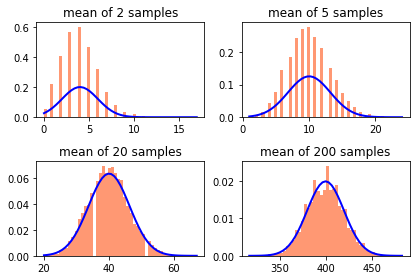

In [62]:
# Number of samples for each trial
samples = [2, 5, 20, 200]
numBins = 50

trials = 10**4

# Poisson Parameters
a = 2

for i, N in enumerate(samples):
    plt.subplot(2,2,i+1)
    plt.tight_layout()
    means = []
    for i in range(trials):
        dist = np.random.poisson(a,N)
        means.append(sum(dist))
    mean = np.mean(means)
    variance = np.var(means)
    count, bins, ignored = plt.hist(means, numBins, normed = True, color = "coral", alpha = 0.8)
    plt.plot(bins, mlab.normpdf(bins, mean, np.sqrt(variance)), color = "blue", linewidth = 2)
    plt.title("mean of " + str(N) + " samples")
plt.savefig("1b.png", dpi=300)

# Problem 2

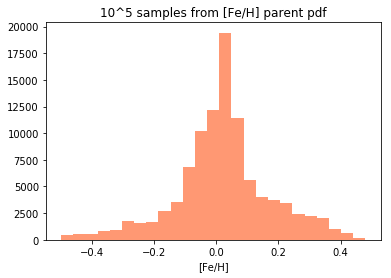

In [13]:
# Load data from exoplanets.org, strip first entry (header)
FeH_data = np.genfromtxt("FeH.csv", delimiter=',')
FeH_data = FeH_data[1:]

# # Get 10^5 samples
numSamples = 10**5
distribution = np.random.choice(FeH_data, numSamples)

plt.hist(distribution, 25, color="coral", alpha = 0.8)
plt.xlabel('[Fe/H]')
plt.title('10^5 samples from [Fe/H] parent pdf')
plt.savefig("2.png", dpi=300)

# Problem 3

## (d)
Use python to plot the data and the regression line you found in 1c.

In [15]:
# Samples
x = [1,3,5]
y = [8,2,1]

avg_x = np.average(x)
avg_y = np.average(y)

cov = 0
for i in range(3):
    cov += (x[i] - avg_x)*(y[i]-avg_y)/3

a = cov/np.var(x)
b = avg_y - a*avg_x

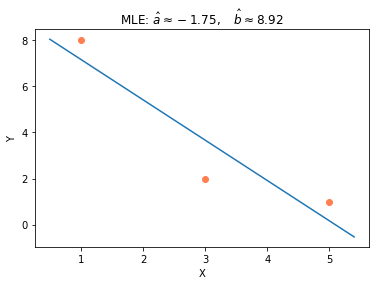

In [50]:
plt.scatter(x, y, marker='o', color="coral")
t = np.arange(0.5, 5.5, 0.1)
plt.plot(t, a*t+b)
plt.title(r'MLE: $\hat{a} \approx -1.75,\quad \hat{b} \approx 8.92$')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig("3d.png", dpi=300)